In [1]:

# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

Data Loading 

In [2]:
# Load train and test datasets
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

In [3]:
# Display first few rows
train.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Display first few rows
test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [5]:
# Display information about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# Display descriptive statistics for the train dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.0,6.483370e+05,3.743180e+05,0.000000e+00,3.241685e+05,6.483370e+05,9.725055e+05,1.296674e+06
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01


In [7]:
# Print the shape of the train dataset
train.shape

(1296675, 23)

In [8]:
# Print the shape of the test dataset
test.shape

(555719, 23)

🔍 Exploratory Data Analysis 

In [9]:
# Check for missing values in the train dataset
train.isnull().values.any()

False

<AxesSubplot:>

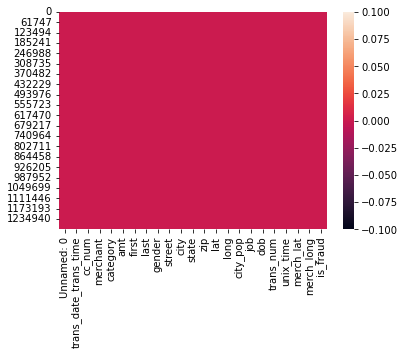

In [10]:
# Plot a heatmap to visualize missing values in the train dataset
sns.heatmap(train.isnull())

In [11]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
def cleaning_data(clean):
    clean.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num',
                'trans_date_trans_time'],axis=1, inplace=True)
    clean.dropna()
    return clean

In [13]:
cleaning_data(train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [14]:
cleaning_data(test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [15]:
# Map 'M' to 0 and 'F' to 1 in the 'gender' column of the train dataset
train['gender'] = train['gender'].map({'M': 0, 'F': 1})

In [16]:
train.head(3)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,1,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,1,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,0,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  int64  
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   city_pop    1296675 non-null  int64  
 7   job         1296675 non-null  object 
 8   unix_time   1296675 non-null  int64  
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 118.7+ MB


In [18]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Define function to encode categorical features
def encode(data):
    data["merchant"] = encoder.fit_transform(data["merchant"])
    data["category"] = encoder.fit_transform(data["category"])
    data["gender"] = encoder.fit_transform(data["gender"])
    data["job"] = encoder.fit_transform(data["job"])
    return data

In [19]:
#  Encode categorical features in the train dataset
encode(train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,1,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,1,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,0,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,0,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,0,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,0,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765,0
1296671,2,1,51.70,0,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528,0
1296672,599,1,105.93,0,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529,0
1296673,509,1,74.90,0,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160,0


In [20]:
# Encode categorical features in the test dataset
encode(test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,40.4931,-91.8912,519,460,1388534347,39.946837,-91.333331,0
555715,264,7,111.84,1,29.0393,-95.4401,28739,198,1388534349,29.661049,-96.186633,0
555716,496,7,86.88,0,46.1966,-118.9017,3684,294,1388534355,46.658340,-119.715054,0
555717,75,13,7.99,1,44.6255,-116.4493,129,58,1388534364,44.470525,-117.080888,0


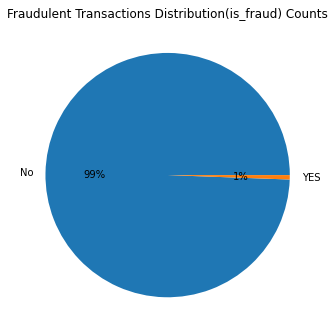

In [21]:
# Calculate the counts of 'is_fraud' values in the train dataset
exit_counts = train["is_fraud"].value_counts()

# Create a figure for the pie chart
plt.figure(figsize=(9, 6))

# Create subplot for the pie chart
plt.subplot(1, 2, 1)

# Plot the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")

# Set title for the pie chart
plt.title("Fraudulent Transactions Distribution(is_fraud) Counts")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
# Calculate the correlation matrix for the train dataset
train.corr()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
merchant,1.000000,0.032302,-0.002633,0.000915,-0.002266,-0.000697,0.001911,0.001360,-0.000999,-0.002263,-0.000673,-0.000536
category,0.032302,1.000000,0.030867,0.028259,-0.008660,-0.000767,0.009386,0.003490,0.000182,-0.008519,-0.000736,0.020205
amt,-0.002633,0.030867,1.000000,-0.001034,-0.001926,-0.000187,0.005818,-0.000628,-0.000293,-0.001873,-0.000151,0.219404
gender,0.000915,0.028259,-0.001034,1.000000,-0.042935,-0.050404,0.028649,0.079908,0.000960,-0.042645,-0.050350,-0.007642
lat,-0.002266,-0.008660,-0.001926,-0.042935,1.000000,-0.015533,-0.155730,-0.027593,0.000632,0.993592,-0.015509,0.001894
long,-0.000697,-0.000767,-0.000187,-0.050404,-0.015533,1.000000,-0.052715,-0.002729,-0.000642,-0.015452,0.999120,0.001721
city_pop,0.001911,0.009386,0.005818,0.028649,-0.155730,-0.052715,1.000000,-0.054945,-0.001714,-0.154781,-0.052687,0.002136
job,0.001360,0.003490,-0.000628,0.079908,-0.027593,-0.002729,-0.054945,1.000000,0.000032,-0.027412,-0.002727,-0.000093
unix_time,-0.000999,0.000182,-0.000293,0.000960,0.000632,-0.000642,-0.001714,0.000032,1.000000,0.000561,-0.000635,-0.005078
merch_lat,-0.002263,-0.008519,-0.001873,-0.042645,0.993592,-0.015452,-0.154781,-0.027412,0.000561,1.000000,-0.015431,0.001741


<AxesSubplot:>

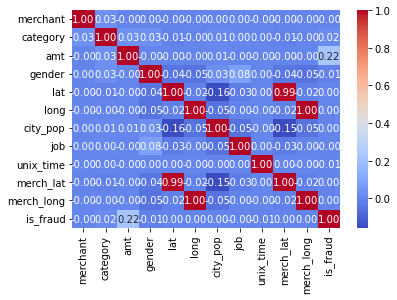

In [23]:
# Plot a heatmap to visualize the correlation matrix for the train dataset
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [24]:
# Separate features (X) and target variable (y)
x = train.drop(columns=["is_fraud"], inplace=False)
y = train["is_fraud"]

In [25]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model Prediction

In [26]:
# Initialize the models
model1 = LogisticRegression()

# Use simplified RandomForestClassifier if default training time is long
# model2 = RandomForestClassifier(n_estimators=100, max_depth=10)

model2 = RandomForestClassifier(n_estimators=100, max_depth=10)
model3 = DecisionTreeClassifier()

In [27]:
# Define a list of model names
columns = ['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier']

# Initialize an empty list to store accuracies
accuracies = []

In [28]:
def cal(model):
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    predictions = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    
    # Append accuracy to the list
    accuracies.append(accuracy)
    
    
    # Print model evaluation on test data
    print("-----Model Evaluation on Test Data-----")
    print(model)
    print()
    print(accuracy)

In [29]:
# LogisticRegression
cal(model1)

-----Model Evaluation on Test Data-----
LogisticRegression()

0.9941388551487458


In [30]:
# RandomForestClassifier
cal(model3)

-----Model Evaluation on Test Data-----
DecisionTreeClassifier()

0.9959743189311122


In [31]:
# DecisionTreeClassifier
cal(model3)

-----Model Evaluation on Test Data-----
DecisionTreeClassifier()

0.9958817745387241


In [32]:
# Print the accuracies obtained from each model
accuracies

[0.9941388551487458, 0.9959743189311122, 0.9958817745387241]

In [33]:
# Create a DataFrame to store the algorithm names and their corresponding accuracies
FinalResult = pd.DataFrame({'Algorithm': columns, 'Accuracy': accuracies})

In [34]:
FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.994139
1,RandomForestClassifier,0.995974
2,DecisionTreeClassifier,0.995882


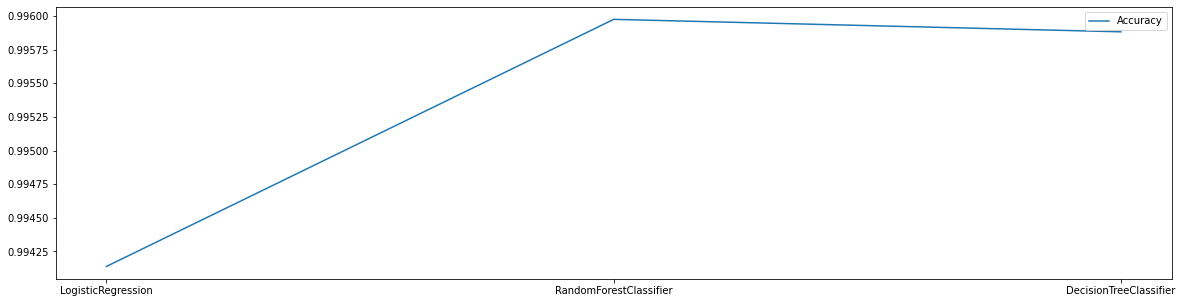

In [35]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 5))

# Plot the accuracies for each algorithm
plt.plot(FinalResult.Algorithm, accuracies, label="Accuracy")

# Add legend
plt.legend()

# Show the plot
plt.show()


# Observations:

👍 Overall, all three models exhibited outstanding accuracy in classifying fraudulent and non-fraudulent transactions, with the Random Forest Classifier emerging as the top performer. ⭐

💡 It is worth noting that while these models achieved high accuracy, further improvements could potentially be made by exploring additional features, tuning hyperparameters, or employing more advanced techniques such as ensemble methods or deep learning algorithms. 🚀